# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data
## Part 1: Reading and Writing Files in Python

Mark Bauer

Table of Contents
=================

   Getting Started
 
   1. Reading In Data from Local Folder
       * 1.1 Reading in a CSV file  
       * 1.2 Reading in a JSON file  
       * 1.3 Reading in an Excel file  
       * 1.4 Reading in a Shapefile  
       * 1.5 Reading in a GeoJSON file   
   2. Reading In Data from the Web         
       * 2.1 Unzipping and reading in data as csv to local folders  
       * 2.2 Unzipping and reading in data as csv from local folder  
       * 2.3 Unzipping and reading in data as csv in memory  
   3. Reading In Data from NYC Open Data  
       * 3.1 Reading in data as CSV in static form  
       * 3.2 Reading in data as JSON in static form  
       * 3.3 Reading in Shapefile data  
       * 3.4 Reading in data from Socrata Open Data API (SODA)    
   4. Writing Out Data  
       * 4.1 Writing to a CSV file  
       * 4.2 Writing to a Excel (xlsx) file  
       * 4.3 Writing to a JSON file  
       * 4.4 Writing to a Shapefile  
   5. Conclusion

**Goal:** In this notebook, we will review various ways to read (load) and write (save) data from NYC Open Data. Specifically, we will focus on reading our data into a pandas dataframe.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
import os
from pathlib import Path
import urllib
import json
import requests
from io import BytesIO
from sodapy import Socrata
import zipfile
from zipfile import ZipFile
from os.path import basename
from openpyxl import Workbook

In [2]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.
# Documention for installing watermark: https://github.com/rasbt/watermark

%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib,json,requests,sodapy

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.22.4
pandas    : 1.4.2
geopandas : 0.9.0
matplotlib: 3.5.2
json      : 2.0.9
requests  : 2.28.1
sodapy    : 2.2.0



# Getting Started: Accessing the Building Footprints Dataset

I've provided sample data for you in the [data folder](https://github.com/mebauer/data-analysis-using-python/tree/master/1-reading-writing-files/data), but follow these steps to access it to follow along. 

## 1. Search NYC Open Data in Google
![building_footprints](images/1.nyc-open-data-google.png)

## 2. Search "Building Footprints" in NYC Open Data search bar
![building_footprints](images/2.building-footprints-opendata-search.png)

## 3. Select "Building Footprints" Dataset
![building_footprints](images/3.building-footprints-dataset-link.png)

## 4. The Building Footprints Dataset Page
![building_footprints](images/4.data-homepage.png)

Dataset Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

**Building Footprints Dataset Identification**

> **Here are a few things to note about the data:**
>
> - **Purpose:** This feature class is used by the NYC DOITT GIS group to maintain and distribute an accurate 'basemap' for NYC. The basemap provides the foundation upon virtually all other geospatial data with New York.
> - **Description:** Building footprints represent the full perimeter outline of each building as viewed from directly above. Additional attribute information maintained for each feature includes: Building Identification Number (BIN); Borough, Block, and Lot information(BBL); ground elevation at building base; roof height above ground elevation; construction year, and feature type.
> - **Source(s):** Annually captured aerial imagery, NYC Research of DOB records, or other image resources.
> - **Publication Dates:** **Data**: 05/03/16<br>
> - **Last Update:** Weekly<br>
> - **Metadata:** 12/22/2016<br>
> - **Update Frequency:** Features are updated daily by DoITT staff and a public release is available weekly on NYC Open Data. Every four years a citywide review is made of the building footprints and features are updated photogrammetrically.
> - **Available Formats:** File Geodatabase Feature Class as part of the Planimetrics geodatabase and individual shapefile on the [NYC Open Data Portal](https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh)
> - **Use Limitations:** Open Data policies and restrictions apply. See [Terms of Use](http://www.nyc.gov/html/data/terms.html)
> - **Access Rights:** Public
> - **Links:** https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh
> - **Tags:** Buildings, Building footprint, BIN, Structure

**Source:** 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Reading In Data from Local Folder

Before we dive into retrieving data on NYC Open Data, let's practice reading data into a pandas dataframe from a local folder. If you'd like to see how I exported this sample data, please visit the [data-wrangling notebook](https://github.com/mebauer/data-analysis-using-python/blob/master/1-reading-writing-files/data-wrangling.ipynb). 

## 1.1 Reading in a CSV file

In [3]:
# read data as a dataframe
df = pd.read_csv('data/sample-data.csv')

# previewing first five rows in data
df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394834,2011.0,08/22/2017 12:00:00 AM,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
1,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,4540159,2010.0,08/22/2017 12:00:00 AM,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
2,MULTIPOLYGON (((-73.7940773567428 40.680625171...,NaN,4260357,2010.0,08/10/2017 12:00:00 AM,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,4540051,2010.0,08/22/2017 12:00:00 AM,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm
4,MULTIPOLYGON (((-73.81520745135124 40.73053646...,NaN,4545453,2012.0,08/22/2017 12:00:00 AM,Constructed,1118502,16.640000,2100.0,74.0,0,0,4.066560e+09,4.066560e+09,Photogramm


In [4]:
rows, columns = df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,498 rows and 15 columns.


**Sanity check**

We use pandas `.head()` method to preview the first five rows of the dataframe.

We use pandas `.shape` method to print the dimensions of the dataframe (i.e. number of rows, number of columns).

We will use these two methods throughout the examples.

## 1.2 Reading in a JSON file

In [5]:
# read data as a dataframe
df = pd.read_json('data/sample-data.json')

# previewing first five rows in data
df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.87172426474349 40.65519420...,None,3394834,2011,08/22/2017 12:00:00 AM,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
1,MULTIPOLYGON (((-73.86650099829305 40.74236058...,None,4540159,2010,08/22/2017 12:00:00 AM,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
2,MULTIPOLYGON (((-73.7940773567428 40.680625171...,None,4260357,2010,08/10/2017 12:00:00 AM,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,None,4540051,2010,08/22/2017 12:00:00 AM,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm
4,MULTIPOLYGON (((-73.81520745135124 40.73053646...,None,4545453,2012,08/22/2017 12:00:00 AM,Constructed,1118502,16.640000,2100.0,74.0,0,0,4.066560e+09,4.066560e+09,Photogramm


In [6]:
rows, columns = df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,498 rows and 15 columns.


## 1.3 Reading in an Excel file

In [7]:
# read data as a dataframe
df = pd.read_excel('data/sample-data.xlsx')

# previewing first five rows in data
df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394834,2011,08/22/2017 12:00:00 AM,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
1,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,4540159,2010,08/22/2017 12:00:00 AM,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
2,MULTIPOLYGON (((-73.7940773567428 40.680625171...,NaN,4260357,2010,08/10/2017 12:00:00 AM,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,4540051,2010,08/22/2017 12:00:00 AM,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm
4,MULTIPOLYGON (((-73.81520745135124 40.73053646...,NaN,4545453,2012,08/22/2017 12:00:00 AM,Constructed,1118502,16.640000,2100.0,74.0,0,0,4.066560e+09,4.066560e+09,Photogramm


In [8]:
rows, columns = df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,498 rows and 15 columns.


## 1.4 Reading in a Shapefile

In [9]:
# read data as a geodataframe
path = 'data/sample-data.shp'
gdf = gpd.read_file(path)

# previewing first five rows in data
gdf.head()

,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry
0,3044520924,3394834.0,2011.0,1250314.0,2100.0,Other (Man,15.0,26.000000,2017-08-22,00:00:00.000,Constructed,3044520924,None,0.0,0.0,"POLYGON ((-73.87172 40.65519, -73.87179 40.655..."
1,4018780115,4540159.0,2010.0,201366.0,2100.0,Other (Man,37.0,28.000000,2017-08-22,00:00:00.000,Constructed,4018780115,None,0.0,0.0,"POLYGON ((-73.86650 40.74236, -73.86645 40.742..."
2,4120060029,4260357.0,2010.0,1184712.0,2100.0,Other (Man,20.0,29.000000,2017-08-10,00:00:00.000,Constructed,4120060029,None,0.0,0.0,"POLYGON ((-73.79408 40.68063, -73.79407 40.680..."
3,4030600139,4540051.0,2010.0,1171655.0,2100.0,Photogramm,112.0,28.330225,2017-08-22,00:00:00.000,Constructed,4030600139,None,0.0,0.0,"POLYGON ((-73.87805 40.71476, -73.87787 40.714..."
4,4066560052,4545453.0,2012.0,1118502.0,2100.0,Photogramm,74.0,16.640000,2017-08-22,00:00:00.000,Constructed,4066560052,None,0.0,0.0,"POLYGON ((-73.81521 40.73054, -73.81546 40.730..."


In [10]:
rows, columns = gdf.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,498 rows and 16 columns.


## 1.5 Reading in a GeoJSON file

In [11]:
path = 'data/sample-data.geojson'
gdf = gpd.read_file(path)

# previewing first five rows in data
gdf.head()

,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry
0,3044520924,3394834.0,2011.0,1250314.0,2100.0,Other (Man,15.0,26.000000,2017-08-22,00:00:00,Constructed,3044520924,None,0.0,0.0,"POLYGON ((-73.87172 40.65519, -73.87179 40.655..."
1,4018780115,4540159.0,2010.0,201366.0,2100.0,Other (Man,37.0,28.000000,2017-08-22,00:00:00,Constructed,4018780115,None,0.0,0.0,"POLYGON ((-73.86650 40.74236, -73.86645 40.742..."
2,4120060029,4260357.0,2010.0,1184712.0,2100.0,Other (Man,20.0,29.000000,2017-08-10,00:00:00,Constructed,4120060029,None,0.0,0.0,"POLYGON ((-73.79408 40.68063, -73.79407 40.680..."
3,4030600139,4540051.0,2010.0,1171655.0,2100.0,Photogramm,112.0,28.330225,2017-08-22,00:00:00,Constructed,4030600139,None,0.0,0.0,"POLYGON ((-73.87805 40.71476, -73.87787 40.714..."
4,4066560052,4545453.0,2012.0,1118502.0,2100.0,Photogramm,74.0,16.640000,2017-08-22,00:00:00,Constructed,4066560052,None,0.0,0.0,"POLYGON ((-73.81521 40.73054, -73.81546 40.730..."


In [12]:
rows, columns = gdf.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,498 rows and 16 columns.


# 2. Reading in Data from the Web

Another popular dataset is NYC's PLUTO dataset. We will use this one because it comes in a zip file.

- **Description**: Extensive land use and geographic data at the tax lot level in comma–separated values (CSV) file format. The PLUTO files contain more than seventy fields derived from data maintained by city agencies.
- **Dataset Link**: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page
- **Data Dictionary**: https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?v=20v1

![building_footprints_csv](images/pluto-csv.png)

## 2.1 Unzipping and reading in data as CSV to local folder

We will retrieve, unzip and read in data in our downloads folder.  
**Note: right-click the Download icon and copy the link address as the url.**

In [13]:
# download url of dataset
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

# a path to our downloads folder 
downloads_path = str(Path.home() / "Downloads")

# a path to our file from our downloads path
fullfilename = os.path.join(downloads_path, 'PLUTO.gz')

# retrieving data 
urllib.request.urlretrieve(url, fullfilename)

('/Users/markbauer/Downloads/PLUTO.gz',
 <http.client.HTTPMessage at 0x16503a970>)

In [14]:
# open zipfile and saving items in our zipfolder
items = zipfile.ZipFile(fullfilename)

# available files in the container
print(items.namelist())

['pluto_20v1.csv', 'PLUTODD20v1.pdf', 'PlutoReadme20v1.pdf']


In [15]:
# opening zipfile using 'with' keyword in read mode
with zipfile.ZipFile(fullfilename, 'r') as file:
    
    # extract all files inside the zip file
    file.extractall(downloads_path)

In [16]:
# read our data into a dataframe from our downloads path
file = 'pluto_20v1.csv'
path = os.path.join(downloads_path, file)

pluto_data = pd.read_csv(
    path,
    low_memory=False
)

pluto_data.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes
0,BK,834,46,307.0,106.0,2001.0,20.0,38.0,11220.0,L114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
1,QN,4042,106,407.0,929.0,3000.0,25.0,19.0,11356.0,E297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000007...,NaN,NaN
2,BK,4679,17,317.0,866.0,3002.0,18.0,41.0,11203.0,L174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000006...,NaN,NaN
3,BK,7831,6,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
4,BK,7831,7,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN


In [17]:
rows, columns = pluto_data.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 859,172 rows and 99 columns.


## 2.2 Unzipping and reading in data as CSV from local folder

In [18]:
# note: ive already placed data into this zip file
file_name = 'data/sample-buildings.zip'

# opening zip using 'with' keyword in read mode
with zipfile.ZipFile(file_name, 'r') as file:
    
    # extracing all items in our zipfile
    file.extractall('data/unzipped-data')

In [19]:
# list files in this file path
%ls data/unzipped-data/

sample-data.csv


In [20]:
# read data as a dataframe
sample_buidlings = pd.read_csv('data/unzipped-data/sample-data.csv')

# previewing first five rows of data
sample_buidlings.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394834,2011.0,08/22/2017 12:00:00 AM,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
1,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,4540159,2010.0,08/22/2017 12:00:00 AM,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
2,MULTIPOLYGON (((-73.7940773567428 40.680625171...,NaN,4260357,2010.0,08/10/2017 12:00:00 AM,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,4540051,2010.0,08/22/2017 12:00:00 AM,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm
4,MULTIPOLYGON (((-73.81520745135124 40.73053646...,NaN,4545453,2012.0,08/22/2017 12:00:00 AM,Constructed,1118502,16.640000,2100.0,74.0,0,0,4.066560e+09,4.066560e+09,Photogramm


In [21]:
rows, columns = sample_buidlings.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 15,498 rows and 15 columns.


## 2.3 Unzipping and reading in data as a CSV in memory

In [22]:
# our download link
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

# reading in our zipfile data in-memory
content = requests.get(url)
zf = ZipFile(BytesIO(content.content))

# printing files in our zipfile
for item in zf.namelist():
    print("File in zip: {}".format(item))

File in zip: pluto_20v1.csv
File in zip: PLUTODD20v1.pdf
File in zip: PlutoReadme20v1.pdf


In [23]:
# read our csv data into a dataframe from our zipfile
file = 'pluto_20v1.csv'
pluto_data = pd.read_csv(
    zf.open(file), 
    low_memory=False
)

# previewing the first five rows of data
pluto_data.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes
0,BK,834,46,307.0,106.0,2001.0,20.0,38.0,11220.0,L114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
1,QN,4042,106,407.0,929.0,3000.0,25.0,19.0,11356.0,E297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000007...,NaN,NaN
2,BK,4679,17,317.0,866.0,3002.0,18.0,41.0,11203.0,L174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000006...,NaN,NaN
3,BK,7831,6,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
4,BK,7831,7,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN


In [24]:
rows, columns = pluto_data.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 859,172 rows and 99 columns.


# 3. Reading in data from NYC Open Data

I picked a really difficult dataset to present for this tutorial - perhaps a good thing? Here are items to note:  
- The building footprints dataset identifier changes weekly, so if you plan on using the Socrata API, you need to constantly look up the new identifer. More information below.
- You can't read in the building footprints dataset from the website as a JSON directly using pandas because it has metadata. I go over a way to retrieve the JSON data below, but note that this workflow is usually uncommon for me - I usually use the CSV option if available.

## 3.1 Reading in data as CSV in static form
![building_footprints_csv](images/building-footprints-csv.png)

# Note: 
The buildings footprints `dataset identifier` changes weekly, and so does the data api path. Click on the API Docs page and verify the correct dataset identifier. If you're not working with the correct id, you will receive a `HTTP Error`. Screenshots below:

**Click on API Docs**
![building_footprints_csv](images/api_docs.png)

**Grab the updated dataset identifier**
![building_footprints_csv](images/api_docs_dataset_id.png)

The `dataset identifier` is inserted into the api path below:  
url = https://data.cityofnewyork.us/api/views/DATASET_IDENTIFIER/rows.csv?accessType=DOWNLOAD

In [25]:
# reading in data as a url from NYC Open Data
url = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'

# saving data as a pandas dataframe named 'df_csv'
df_csv = pd.read_csv(url)

# previewing the first five rows 
df_csv.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm


In [26]:
rows, columns = df_csv.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,393 rows and 15 columns.


## 3.2 Reading in data as JSON in static form
![building_footprints_csv](images/building-footprints-json.png)

In [27]:
url = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.json?accessType=DOWNLOAD'

# loads a json object as a python object
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())
    
# identifying type of python object
print('type: {}'.format(type(data)))

# reviewing the dictionairy's keys
print('keys: {}'.format(data.keys()))

type: <class 'dict'>
keys: dict_keys(['meta', 'data'])


In [28]:
# previewing the first row of our data
data['data'][0]

['row-sjnj_6qyk-kdqz',
 '00000000-0000-0000-D5B4-AA47036B2160',
 0,
 1683658073,
 None,
 1683658073,
 None,
 '{ }',
 'MULTIPOLYGON (((-73.96664570466969 40.62599676998366, -73.96684846176461 40.625977490862574, -73.96685938726297 40.62604419372411, -73.96661621040211 40.62606731716107, -73.96660638332114 40.626007324369795, -73.96664680403327 40.626003480977275, -73.96664570466969 40.62599676998366)))',
 None,
 '3170958',
 '1925',
 '2017-08-22T00:00:00',
 'Constructed',
 '96807',
 '29.74985318',
 '2100',
 '40',
 '0.0',
 '0.0',
 '3065220021',
 '3065220021',
 'Photogramm']

In [29]:
# Retrieving column names from the meta data.
data['meta'].keys()

dict_keys(['view'])

In [30]:
# preview view keys
keys = data['meta']['view'].keys()

for key in keys:
    print(key)

id
name
assetType
averageRating
createdAt
displayType
downloadCount
hideFromCatalog
hideFromDataJson
newBackend
numberOfComments
oid
provenance
publicationAppendEnabled
publicationDate
publicationGroup
publicationStage
rowsUpdatedAt
rowsUpdatedBy
tableId
totalTimesRated
viewCount
viewLastModified
viewType
approvals
clientContext
columns
grants
metadata
owner
query
rights
tableAuthor
flags


In [31]:
# locating our columns (i.e. field names) and saving as a new variable called 'cols'
cols = data['meta']['view']['columns']
print('length of columns: {}'.format(len(cols)))

# previewing first five
cols[:5]

length of columns: 23


[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']}]

In [32]:
col_names = []
for col in cols:
    print(col['fieldName'])
    col_names.append(col['fieldName'])

:sid
:id
:position
:created_at
:created_meta
:updated_at
:updated_meta
:meta
the_geom
name
bin
cnstrct_yr
lstmoddate
lststatype
doitt_id
heightroof
feat_code
groundelev
shape_area
shape_len
base_bbl
mpluto_bbl
geomsource


In [33]:
# constructing a dataframe
df_json = pd.DataFrame(
    data['data'],
    columns=col_names
)

df_json.head()

,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,the_geom,name,...,lststatype,doitt_id,heightroof,feat_code,groundelev,shape_area,shape_len,base_bbl,mpluto_bbl,geomsource
0,row-sjnj_6qyk-kdqz,00000000-0000-0000-D5B4-AA47036B2160,0,1683658073,None,1683658073,None,{ },MULTIPOLYGON (((-73.96664570466969 40.62599676...,None,...,Constructed,96807,29.74985318,2100,40,0.0,0.0,3065220021,3065220021,Photogramm
1,row-qpqu.4ypb_tyzm,00000000-0000-0000-A7B9-9681F0DE159C,0,1683658073,None,1683658073,None,{ },MULTIPOLYGON (((-74.16790202462265 40.63936048...,None,...,Constructed,326368,22.63,2100,39,0.0,0.0,5012640036,5012640036,Photogramm
2,row-wcnq_7nsf-bdub,00000000-0000-0000-F8E3-B02B484B3A09,0,1683658073,None,1683658073,None,{ },MULTIPOLYGON (((-74.19510813278613 40.55610681...,None,...,Constructed,746627,35.76,2100,51,0.0,0.0,5060190091,5060190091,Photogramm
3,row-gacu-aj6t-hnkj,00000000-0000-0000-C990-9AEEA50AB1AF,0,1683658073,None,1683658073,None,{ },MULTIPOLYGON (((-73.96113466505085 40.57743931...,None,...,Constructed,786626,37.5,2100,6,0.0,0.0,3086910048,3086910048,Photogramm
4,row-eu9h_evqv.v73a,00000000-0000-0000-3015-B1ED1C5C6D9C,0,1683658073,None,1683658073,None,{ },MULTIPOLYGON (((-73.75421559146166 40.75591276...,None,...,Constructed,746409,18.01511294,2100,93,0.0,0.0,4075020005,4075020005,Photogramm


In [34]:
df_json.columns

Index([':sid', ':id', ':position', ':created_at', ':created_meta',
       ':updated_at', ':updated_meta', ':meta', 'the_geom', 'name', 'bin',
       'cnstrct_yr', 'lstmoddate', 'lststatype', 'doitt_id', 'heightroof',
       'feat_code', 'groundelev', 'shape_area', 'shape_len', 'base_bbl',
       'mpluto_bbl', 'geomsource'],
      dtype='object')

In [35]:
# removing unwanted columns
df_json = df_json.loc[:, [
    'the_geom', 'name', 'bin', 
    'cnstrct_yr', 'lstmoddate', 'lststatype',
    'doitt_id', 'heightroof', 'feat_code', 
    'groundelev', 'base_bbl', 'mpluto_bbl', 'geomsource']
]

df_json.head()

,the_geom,name,bin,cnstrct_yr,lstmoddate,lststatype,doitt_id,heightroof,feat_code,groundelev,base_bbl,mpluto_bbl,geomsource
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,None,3170958,1925,2017-08-22T00:00:00,Constructed,96807,29.74985318,2100,40,3065220021,3065220021,Photogramm
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,None,5028452,1965,2017-08-22T00:00:00,Constructed,326368,22.63,2100,39,5012640036,5012640036,Photogramm
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,None,5078368,1970,2017-08-22T00:00:00,Constructed,746627,35.76,2100,51,5060190091,5060190091,Photogramm
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,None,3245111,1928,2017-08-22T00:00:00,Constructed,786626,37.5,2100,6,3086910048,3086910048,Photogramm
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,None,4161096,1950,2017-08-22T00:00:00,Constructed,746409,18.01511294,2100,93,4075020005,4075020005,Photogramm


In [36]:
#sanity check
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084393 entries, 0 to 1084392
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   the_geom    1084393 non-null  object
 1   name        1932 non-null     object
 2   bin         1084393 non-null  object
 3   cnstrct_yr  1073625 non-null  object
 4   lstmoddate  1084393 non-null  object
 5   lststatype  1084111 non-null  object
 6   doitt_id    1084393 non-null  object
 7   heightroof  1081704 non-null  object
 8   feat_code   1084388 non-null  object
 9   groundelev  1083850 non-null  object
 10  base_bbl    1084393 non-null  object
 11  mpluto_bbl  1084393 non-null  object
 12  geomsource  1084132 non-null  object
dtypes: object(13)
memory usage: 107.6+ MB


In [37]:
# printing dimensions of data
rows, columns = df_json.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,393 rows and 13 columns.


## 3.3 Reading in Shapefile data
![building_footprints_csv](images/building-footprints-shp.png)

In [38]:
url = 'https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=Shapefile'

# reading in data as a geodataframe
gdf = gpd.read_file(url)

# printing the firt five rows
gdf.head()

,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,geometry
0,3065220021,3170958.0,1925.0,96807.0,2100.0,Photogramm,40.0,29.749853,2017-08-22,00:00:00.000,Constructed,3065220021,None,POINT (-73.96673 40.62602)
1,5012640036,5028452.0,1965.0,326368.0,2100.0,Photogramm,39.0,22.630000,2017-08-22,00:00:00.000,Constructed,5012640036,None,POINT (-74.16795 40.63932)
2,5060190091,5078368.0,1970.0,746627.0,2100.0,Photogramm,51.0,35.760000,2017-08-22,00:00:00.000,Constructed,5060190091,None,POINT (-74.19518 40.55610)
3,3086910048,3245111.0,1928.0,786626.0,2100.0,Photogramm,6.0,37.500000,2017-08-22,00:00:00.000,Constructed,3086910048,None,POINT (-73.96116 40.57742)
4,4075020005,4161096.0,1950.0,746409.0,2100.0,Photogramm,93.0,18.015113,2017-08-22,00:00:00.000,Constructed,4075020005,None,POINT (-73.75429 40.75584)


In [39]:
rows, columns = gdf.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,393 rows and 14 columns.


<AxesSubplot:>

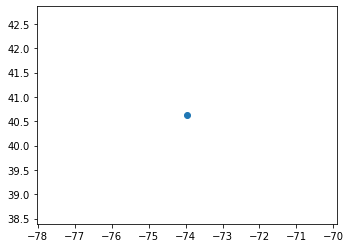

In [40]:
# plotting one building footprint centroid
gdf.head(1).plot()

## 3.4 Reading in data from Socrata Open Data API (SODA)
**Note: If you haven't signed up for an app token, there is a 1,000 rows limit.**

![building_footprints_csv](images/building-footprints-soda-api.png)

In [41]:
# nyc open data domain
socrata_domain = 'data.cityofnewyork.us' 

# building footprints dataset identifier
socrata_dataset_identifier = 'qb5r-6dgf' 

# The main class that interacts with the SODA API.     
client = Socrata(socrata_domain, None)

print('client.__dict__:\n{}'.format(client.__dict__))

client.__dict__:
{'domain': 'data.cityofnewyork.us', 'session': <requests.sessions.Session object at 0x1652eb220>, 'uri_prefix': 'https://', 'timeout': 10}


We are setting the **limit** at **1,000 rows** (i.e. the full data set).

In [42]:
# retrieving data as a dictionary 
results = client.get(
    socrata_dataset_identifier,
    limit=1000
)

# creating a dataframe from our dictionary
df_api = pd.DataFrame.from_dict(results)

# ending our API request
client.close()

# printing first five rows of data
df_api.head()

,the_geom,bin,cnstrct_yr,lstmoddate,lststatype,doitt_id,heightroof,feat_code,groundelev,shape_area,shape_len,base_bbl,mpluto_bbl,geomsource
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3170958,1925,2017-08-22T00:00:00.000,Constructed,96807,29.74985318,2100,40,0.0,0.0,3065220021,3065220021,Photogramm
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",5028452,1965,2017-08-22T00:00:00.000,Constructed,326368,22.63,2100,39,0.0,0.0,5012640036,5012640036,Photogramm
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",5078368,1970,2017-08-22T00:00:00.000,Constructed,746627,35.76,2100,51,0.0,0.0,5060190091,5060190091,Photogramm
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",3245111,1928,2017-08-22T00:00:00.000,Constructed,786626,37.5,2100,6,0.0,0.0,3086910048,3086910048,Photogramm
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",4161096,1950,2017-08-22T00:00:00.000,Constructed,746409,18.01511294,2100,93,0.0,0.0,4075020005,4075020005,Photogramm


In [43]:
rows, columns = df_api.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,000 rows and 14 columns.


**Useful resources:**
    
- API Docs: https://dev.socrata.com/foundry/data.cityofnewyork.us/i62d-kjv8
- Sign up for app token: https://data.cityofnewyork.us/profile/edit/developer_settings
- Python client for the Socrata Open Data API: https://github.com/xmunoz/sodapy
- Examples: https://github.com/xmunoz/sodapy/tree/master/examples

# 4. Writing Out Data

In [44]:
# read data as a dataframe
df = pd.read_csv('data/sample-data.csv')

# previewing first five rows in data
df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394834,2011.0,08/22/2017 12:00:00 AM,Constructed,1250314,26.000000,2100.0,15.0,0,0,3.044521e+09,3.044521e+09,Other (Man
1,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,4540159,2010.0,08/22/2017 12:00:00 AM,Constructed,201366,28.000000,2100.0,37.0,0,0,4.018780e+09,4.018780e+09,Other (Man
2,MULTIPOLYGON (((-73.7940773567428 40.680625171...,NaN,4260357,2010.0,08/10/2017 12:00:00 AM,Constructed,1184712,29.000000,2100.0,20.0,0,0,4.120060e+09,4.120060e+09,Other (Man
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,4540051,2010.0,08/22/2017 12:00:00 AM,Constructed,1171655,28.330225,2100.0,112.0,0,0,4.030600e+09,4.030600e+09,Photogramm
4,MULTIPOLYGON (((-73.81520745135124 40.73053646...,NaN,4545453,2012.0,08/22/2017 12:00:00 AM,Constructed,1118502,16.640000,2100.0,74.0,0,0,4.066560e+09,4.066560e+09,Photogramm


## 4.1 Writing to a CSV file

In [45]:
# writing files as a csv
df.to_csv('data/output.csv', index=False)

# listing items in data folder
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


## 4.2 Writing to an Excel (xlsx) file

In [46]:
# writing files as an excel file
df.to_excel('data/output.xlsx', index=False)

# listing items in data folder
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


## 4.3 Writing to a JSON file

In [47]:
# writing files as json
df.to_json('data/output.json')

# listing items in data folder
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


## 4.4 Writing to a Shapefile

In [48]:
# read data as a geodataframe
gdf = gpd.read_file('data/sample-data.shp')

# previewing first five rows in data
gdf.head()

,base_bbl,bin,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry
0,3044520924,3394834.0,2011.0,1250314.0,2100.0,Other (Man,15.0,26.000000,2017-08-22,00:00:00.000,Constructed,3044520924,None,0.0,0.0,"POLYGON ((-73.87172 40.65519, -73.87179 40.655..."
1,4018780115,4540159.0,2010.0,201366.0,2100.0,Other (Man,37.0,28.000000,2017-08-22,00:00:00.000,Constructed,4018780115,None,0.0,0.0,"POLYGON ((-73.86650 40.74236, -73.86645 40.742..."
2,4120060029,4260357.0,2010.0,1184712.0,2100.0,Other (Man,20.0,29.000000,2017-08-10,00:00:00.000,Constructed,4120060029,None,0.0,0.0,"POLYGON ((-73.79408 40.68063, -73.79407 40.680..."
3,4030600139,4540051.0,2010.0,1171655.0,2100.0,Photogramm,112.0,28.330225,2017-08-22,00:00:00.000,Constructed,4030600139,None,0.0,0.0,"POLYGON ((-73.87805 40.71476, -73.87787 40.714..."
4,4066560052,4545453.0,2012.0,1118502.0,2100.0,Photogramm,74.0,16.640000,2017-08-22,00:00:00.000,Constructed,4066560052,None,0.0,0.0,"POLYGON ((-73.81521 40.73054, -73.81546 40.730..."


In [49]:
gdf.to_file('data/output.shp', index=False)

# listing items in data folder
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


# 5. Conclusion

In this notebook, we reviewed various ways to read (load) and write (save) data from NYC Open Data. Specifically, we focused on reading our data into a pandas dataframe. We also went over common file formats that you might encounter - csv, json, shapefiles, and zip files. In Part II, we will focus on basic data inspection and wrangling techniques in the data analysis workflow.